***Data Description***

1. Sessions Dataset: The sessions dataset consists of 5 variables (coloumns) and 1,535 rows. The variables names are hashedemail, start_time, end_time, original_end_time, original_start_time. The original_end_time and original_start_time appear to be in Unix format which is in seconds and began in January 1, 1970.

2. Players Dataset: The players dataset consists of 7 variables and 196 rows. The variable names are experience, subscribe, hashedemail, played_hours, name, gender, and Age. There seems to be missing data in some rows (only saw 1 at the time of writing this part), Datasets will be tidy when used.

hashedemail will obviously be the link to these 2 data sets and what data belongs to what person. We can also think about if age links to play time, experience links to time played on the server, and more. The subscribe variable in the players dataset is confusing to me and will probably be useless as I do not see a purpose for it and how it can help us model a trend. (Make sure to keep an eye on Age, experience, hashedemail, all the times, and played_hours)

***Questions***

**Broad Question:**
Can player attributes (such as experience level, subscription status, and age) predict the total number of hours a player has played?

**Specific Question:**
Does a player's experience level, subscription status, and age significantly influence their total played hours in this dataset?

**Data Variables:**
Response Variable (Dependent): played_hours (Total number of hours a player has played)
Explanatory Variables (Independent):
experience (Pro, Veteran, Regular, Amateur)
subscribe (TRUE/FALSE)
Age (Player’s age)

**How the Data Will Help Answer This Question:**

**Wrangling the Data:**
We will link sessions.csv and players.csv using hashedemail as a "bridge".
If needed, we will aggregate session data to confirm played_hours consistency.
Convert categorical variables (experience, subscribe) into numerical values for analysis.

**Analysis & Predictive Methods:**
We can apply regression analysis to determine if experience, subscribe, and age have a significant impact on played_hours.
Alternatively, we can use classification models to predict whether a player falls into high/low playtime groups based on these attributes.
We will visualize trends using histograms, scatter plots, and boxplots to explore patterns.

***Exploratory Data Analysis and Visualization***

In [33]:
library(tidyverse)
library(ggplot2)
library(repr)

options(repr.plot.width=12, repr.plot.height=12)

In [29]:
players <- read.csv("Data/players.csv")
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [30]:
sessions <- read.csv("Data/sessions.csv")
sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [31]:
# mean value for played hours and age in data set players.csv
summarize(players, average_age = mean(Age, na.rm = TRUE))

summarize(players, average_played_hours = mean(played_hours, na.rm = TRUE))

average_age
<dbl>
20.52062


average_played_hours
<dbl>
5.845918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


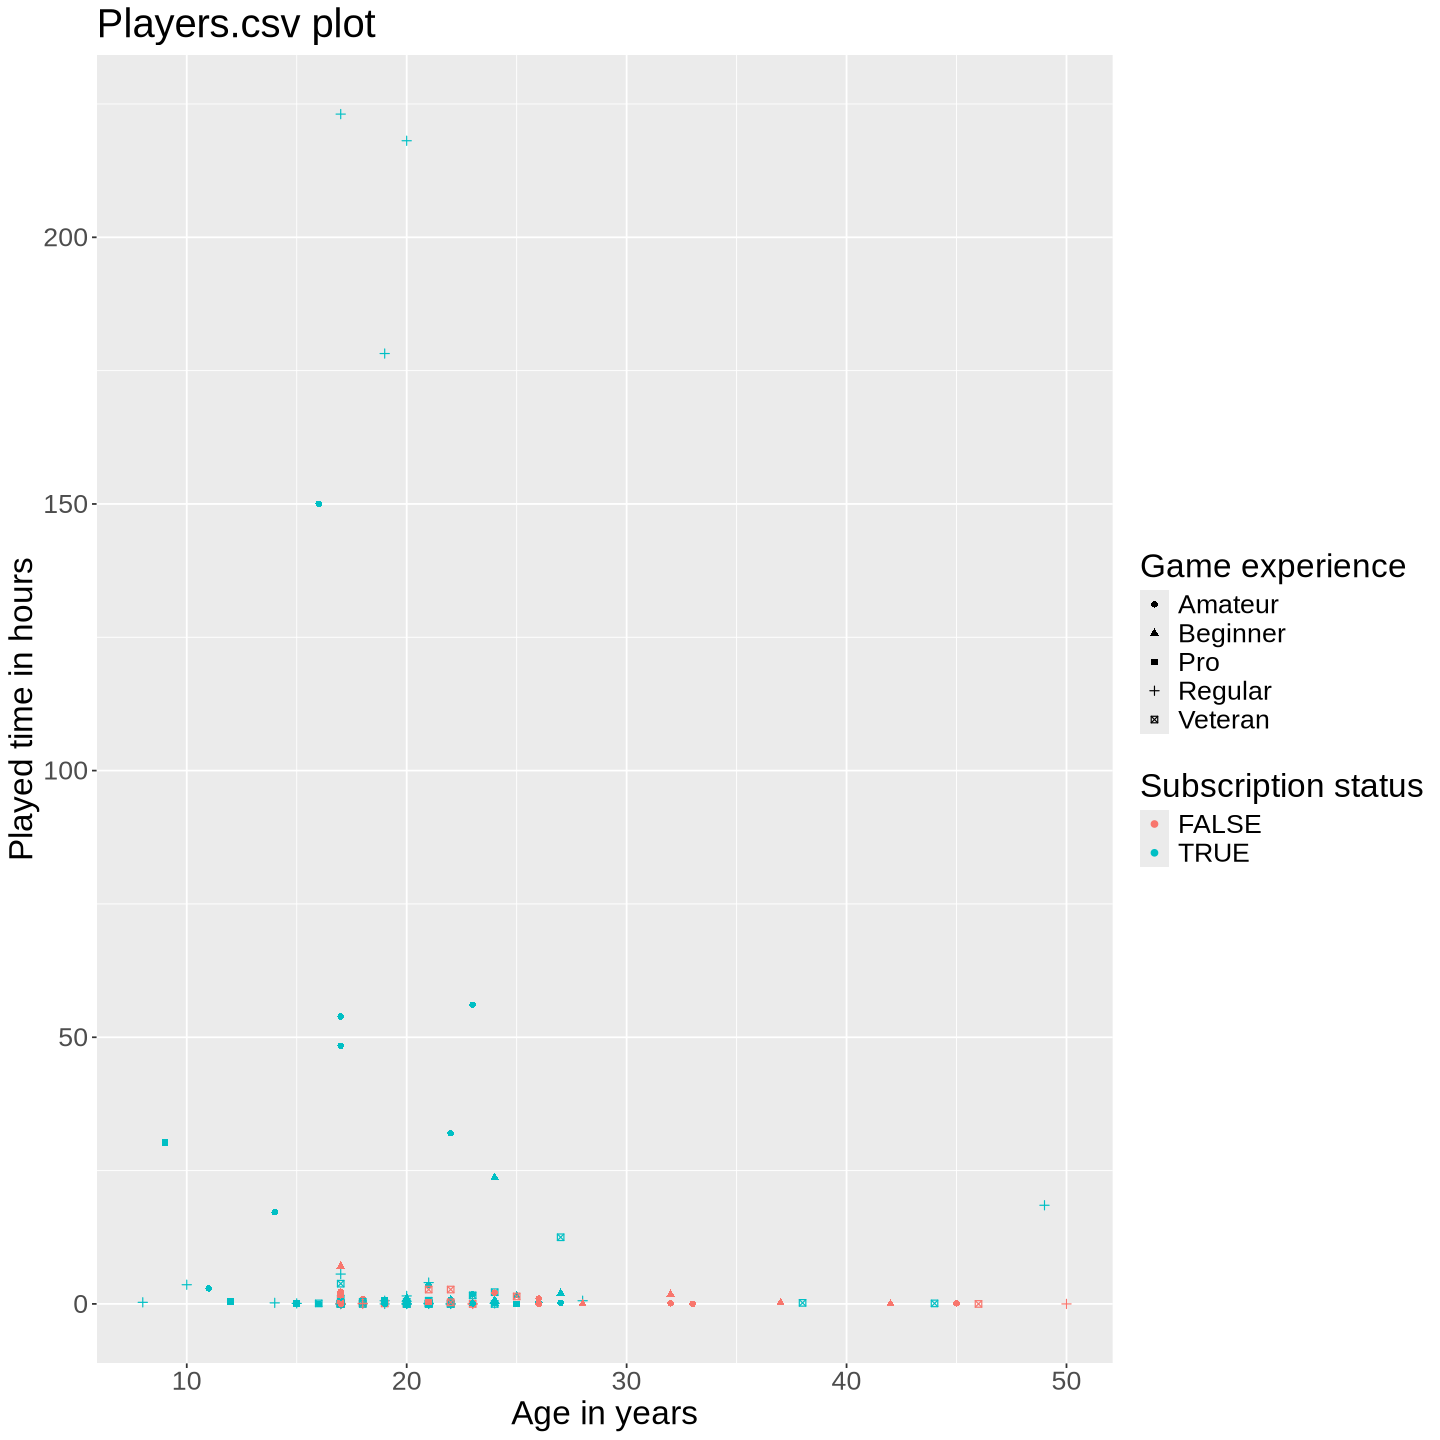

In [36]:
players_plot <- players |>
    ggplot(aes(x = Age, y = played_hours)) + 
        geom_point(aes(colour = subscribe, shape = experience)) +
        labs(title = "Players.csv plot",x = "Age in years", y = "Played time in hours", colour = "Subscription status", shape = "Game experience") +
        theme(text = element_text(size=20))
players_plot

Observations:

Played Time Distribution:
The majority of players have low played time (clustered near zero).
A few outliers show significantly higher played time (above 150 hours), mostly among younger players.

Age vs. Played Time:
Younger players (below 20 years) tend to have higher played time compared to older players.
Players above 30 years mostly have very low played time.

Subscription Status:
Subscribed players (blue) tend to have higher played time.
Non-subscribers (red) mostly have low played time, with no extreme outliers.

Game Experience:
Different experience levels are represented in the plot, but players with higher played time tend to be Regulars or Veterans.
Beginners and Amateurs are more common at lower played time levels.

Anticipated Problems:

Skewed Data: The dataset is heavily skewed towards low played time, which might affect any predictive modeling.
Sparse High-Played-Time Points: The number of players with very high played time is low, making it hard to generalize trends.
Age-Played Time Relationship: Older players have significantly less played time, which may introduce bias in age-related predictions.
Subscription Impact: Since most high played-time points belong to subscribers, any modeling needs to consider subscription status as a key factor.

**Methods and Plan**

**Proposed Method: Regression (Linear Regression)**

*Why is this method appropriate?*

We want to predict a continuous value (played time), which makes regression the right choice.
Linear Regression helps understand how age, experience, and subscription affect played time.
Random Forest Regression can handle more complex patterns if the data isn't linear.
____________________________________________________________________
*What assumptions are required?*

Linear Regression assumes a straight-line relationship between features and played time.
____________________________________________________________________
*What are the potential weaknesses?*

Linear Regression might not work well if the relationships are not straight-line.
____________________________________________________________________

*How will we compare and choose the best model?*

We’ll check how well the model predicts played time using error metrics like MAE (Mean Absolute Error).
____________________________________________________________________
*How will we process the data?*

Split the data: 80% for training, 20% for testing.

Convert categories: Turn experience level and subscription status into numbers.

Handle outliers: If some players have extremely high played time, decide whether to keep or adjust them.

Normalize if needed: If using Linear Regression, scale age and played time for better results.